In [5]:
# G1 Capstone Project_Stat
#This project is a project given for statistics and mathematics for datascience course


# Table of content
- [Importing libraries] 
- [Importing the dataset]
- Summary of the dataset
- Duplicates and missing values management
- OUtlier detection and management
- Summary statistics of the cleaned data
- Histogram for numerical variables (with kde)
- Box plot and scatterplot for numerical columns
- Correlation between different numerical variables and total amount
- Hypothesis testing
- Linear regression model
- ANOVA for categorical columns
- Time series analysis





# Importing-libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [9]:
# ...existing code...
import os
from pathlib import Path
import pandas as pd

print("Notebook working dir:", Path.cwd())

candidates = [
    Path.cwd() / "synthetic_retail_data.csv",  # relative (recommended if file is in repo)
    Path(r"D:\Data Science bootcamp\Git\stat_capstone\synthetic_retail_data.csv"),
    Path(r"c:\Users\dret967\OneDrive - The University of Auckland\Documents\Desalegn\PHD\Baaccumen\Project new\stat_capstone\synthetic_retail_data.csv")
]

found = None
for p in candidates:
    print("Checking:", p)
    if p.exists():
        found = p
        break

if not found:
    print("Files in cwd:", os.listdir(Path.cwd()))
    raise FileNotFoundError(
        "CSV not found. Place 'synthetic_retail_data.csv' in the notebook folder or update the path.\n"
        "Checked:\n  " + "\n  ".join(str(p) for p in candidates)
    )

# Safe read using a path (no escape issues)
retail_df = pd.read_csv(found)
retail_df = pd.DataFrame(retail_df)
print(retail_df.head())
# ...existing code...

Notebook working dir: c:\Users\dret967\OneDrive - The University of Auckland\Documents\Desalegn\PHD\Baaccumen\Project new\stat_capstone
Checking: c:\Users\dret967\OneDrive - The University of Auckland\Documents\Desalegn\PHD\Baaccumen\Project new\stat_capstone\synthetic_retail_data.csv
   InvoiceNo CustomerID      Date ProductCategory  Quantity  UnitPrice  \
0  INV105646   CUST1810  1/1/2023            Home         7      67.88   
1  INV105099   CUST1530  1/1/2023            Toys         6      24.22   
2  INV102818   CUST1701  1/1/2023     Electronics         6     158.78   
3  INV107351   CUST1323  1/1/2023     Electronics         5     102.23   
4  INV108415   CUST1406  1/1/2023     Electronics         8      62.32   

   DiscountApplied  ReviewRating  IsFirstPurchase MarketingChannel  ...  \
0             44.6           4.0                0          Organic  ...   
1              0.0           2.0                1           Social  ...   
2             25.9           5.0            

Why I run the above code?
Problem
- The notebook originally used an absolute Windows path ( `D:\...`) which causes SyntaxWarning for backslashes and fails for other users/machines (FileNotFoundError).
Therefore, I run the above code  to creat a Repo relative path.


# Summary of the dataset

In [11]:
print(retail_df.info())
print(retail_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


# Duplicates and missing values management

Import and examine the dataset.
Identify missing values and apply appropriate treatment.
Detect and address outliers in dataset.
Prepare data for analysis and modeling.

In [13]:
print("Missing values", retail_df.isnull().sum())
print("Duplicated values", retail_df.duplicated().sum())

Missing values InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
Unnamed: 17         9500
Unnamed: 18         8271
Unnamed: 19         9500
Unnamed: 20         8271
Unnamed: 21         8271
Unnamed: 22         8271
dtype: int64
Duplicated values 0


Since there are no duplicates , we will continue to manage the missing values. 

# unnamed 17 and 19 are fully null values, unnamed 18, 20, 21 and 22 have similar "8271" null value. 
Where as 
ReviewRating has a missing value of 1665
MarketingChannel has a missing value of 472
TimeOnSite has a missing value of 475
# The management of missing value of each column will be different. 


In [ ]:
# removing columns with no values at all
no_value_columns = retail_df.columns[retail_df.isnull().all()]
retail_df = retail_df.drop(columns=no_value_columns)

#columns name "Unnamed 17 and Unnamed 19" have 100% missing values.
print (retail_df.head())


   InvoiceNo CustomerID      Date ProductCategory  Quantity  UnitPrice  \
0  INV105646   CUST1810  1/1/2023            Home         7      67.88   
1  INV105099   CUST1530  1/1/2023            Toys         6      24.22   
2  INV102818   CUST1701  1/1/2023     Electronics         6     158.78   
3  INV107351   CUST1323  1/1/2023     Electronics         5     102.23   
4  INV108415   CUST1406  1/1/2023     Electronics         8      62.32   

   DiscountApplied  ReviewRating  IsFirstPurchase MarketingChannel  ...  \
0             44.6           4.0                0          Organic  ...   
1              0.0           2.0                1           Social  ...   
2             25.9           5.0                1            Email  ...   
3             39.0           3.0                1           Social  ...   
4             26.7           4.0                0            Email  ...   

  TimeOnSite  ShippingCost  ItemsInCart  PreviousSpending  BrowsingSessions  \
0      273.8          6.8

"Unnamed 17 and Unnamed 19" have 100% missing values, so we can drop them.

In [ ]:
# variables with missing values
missing_col = [col for col in retail_df.columns if retail_df[col].isnull().sum()>0]
print(missing_col)

['ReviewRating', 'MarketingChannel', 'TimeOnSite', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22']


In [ ]:
#list of variables with missing values with total number of missing values 
missing_col = {col: retail_df[col].isnull().sum() for col in retail_df.columns if retail_df[col].isnull().sum()>0}
print(missing_col)

{'ReviewRating': np.int64(1665), 'MarketingChannel': np.int64(472), 'TimeOnSite': np.int64(475), 'Unnamed: 18': np.int64(8271), 'Unnamed: 20': np.int64(8271), 'Unnamed: 21': np.int64(8271), 'Unnamed: 22': np.int64(8271)}


Considering the size of the data, four (4) of which doesn't seem to have adequate sample size. We believe we can exclude it from the analysis without effect on the analysis. (unnamed 18, 20, 21, 22)

In [18]:
# removme columns with too many missing values
retail_df.drop(columns=['Unnamed: 18', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], inplace=True)
print(retail_df.head())


   InvoiceNo CustomerID      Date ProductCategory  Quantity  UnitPrice  \
0  INV105646   CUST1810  1/1/2023            Home         7      67.88   
1  INV105099   CUST1530  1/1/2023            Toys         6      24.22   
2  INV102818   CUST1701  1/1/2023     Electronics         6     158.78   
3  INV107351   CUST1323  1/1/2023     Electronics         5     102.23   
4  INV108415   CUST1406  1/1/2023     Electronics         8      62.32   

   DiscountApplied  ReviewRating  IsFirstPurchase MarketingChannel    Country  \
0             44.6           4.0                0          Organic        USA   
1              0.0           2.0                1           Social        USA   
2             25.9           5.0                1            Email    Germany   
3             39.0           3.0                1           Social  Australia   
4             26.7           4.0                0            Email         UK   

   TimeOnSite  ShippingCost  ItemsInCart  PreviousSpending  Browsing

#unnamed 18, 20, 21, 22 are removed

Let us check the remaining missing variables.

In [ ]:
final_missing_col = {col: retail_df[col].isnull().sum() for col in retail_df.columns if retail_df[col].isnull().sum()>0}
print(final_missing_col)

{'ReviewRating': np.int64(1665), 'MarketingChannel': np.int64(472), 'TimeOnSite': np.int64(475)}


In [ ]:
print(retail_df['ReviewRating'].describe())
print(retail_df['ReviewRating'].info())
print("Mode", retail_df['ReviewRating'].mode())
print("Median", retail_df['ReviewRating'].median())


count    7835.000000
mean        3.481302
std         1.062269
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: ReviewRating, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: ReviewRating
Non-Null Count  Dtype  
--------------  -----  
7835 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None
Mode 0    4.0
Name: ReviewRating, dtype: float64
Median 4.0


In [ ]:
# Both median and mode are 4.0. We will replace the missing values with 4.0 in Review rating. 
retail_df['ReviewRating'] = retail_df['ReviewRating'].fillna(retail_df['ReviewRating'].mode()[0])

In [ ]:
print(retail_df["MarketingChannel"].describe())

count      9028
unique        5
top       Email
freq       2768
Name: MarketingChannel, dtype: object


In [ ]:
print(retail_df["MarketingChannel"].mode())

0    Email
Name: MarketingChannel, dtype: object


In [ ]:
# replace missing value with mode "Email" in MarketingChannel
retail_df["MarketingChannel"]= retail_df["MarketingChannel"].fillna("Email")


In [ ]:
print(retail_df["TimeOnSite"].info())
print(retail_df["TimeOnSite"].describe())
print("Mode", retail_df["TimeOnSite"].mode())
print("Median", retail_df["TimeOnSite"].median())

<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: TimeOnSite
Non-Null Count  Dtype  
--------------  -----  
9025 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None
count    9025.000000
mean      299.567878
std       118.555281
min        30.000000
25%       218.900000
50%       296.800000
75%       379.800000
max       739.100000
Name: TimeOnSite, dtype: float64
Mode 0    30.0
Name: TimeOnSite, dtype: float64
Median 296.8


In [ ]:
# we will replace the missing value with mean of the column inplace of it
retail_df["TimeOnSite"]=  retail_df["TimeOnSite"].fillna(retail_df["TimeOnSite"].mean())

In [ ]:
#check if there is any missing value remaining 
print(retail_df.isnull().sum())

InvoiceNo           0
CustomerID          0
Date                0
ProductCategory     0
Quantity            0
UnitPrice           0
DiscountApplied     0
ReviewRating        0
IsFirstPurchase     0
MarketingChannel    0
Country             0
TimeOnSite          0
ShippingCost        0
ItemsInCart         0
PreviousSpending    0
BrowsingSessions    0
TotalAmount         0
dtype: int64


# Outlier detection and management

Detect and address outliers in dataset.
Prepare data for analysis and modeling.
Descriptive Statistics & Exploratory Analysis
Compute summary statistics (mean, median, mode, variance, standard deviation, IQR).
Generate distribution plots (histograms, boxplots, scatterplots).

In [ ]:
# Outlier Detection and Treatment
numeric_cols = retail_df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount']


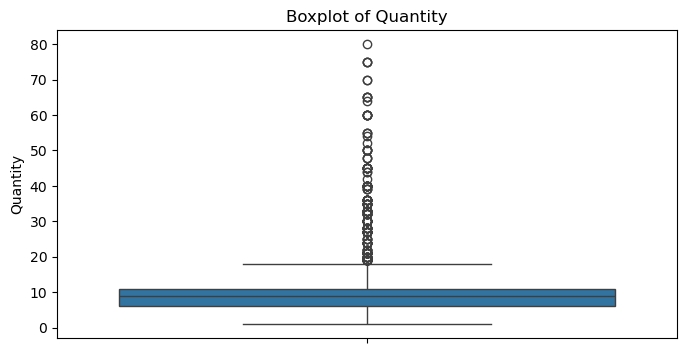

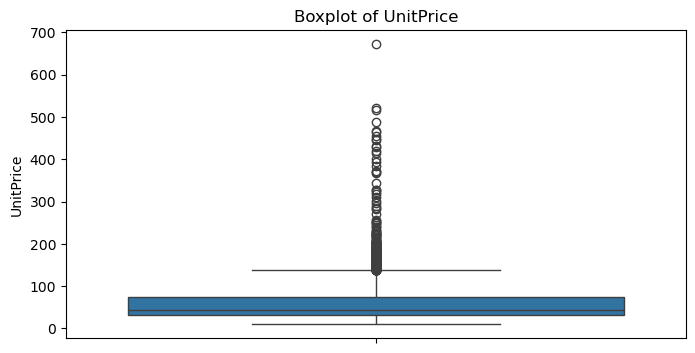

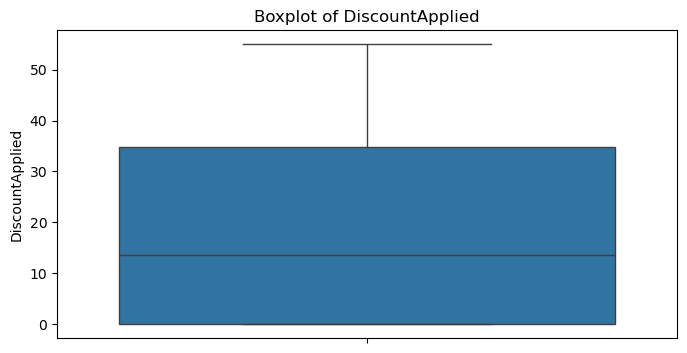

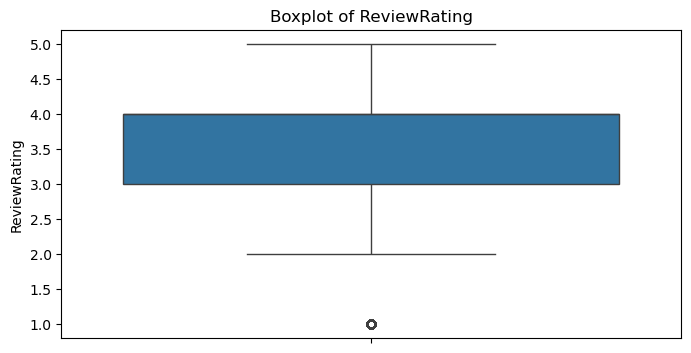

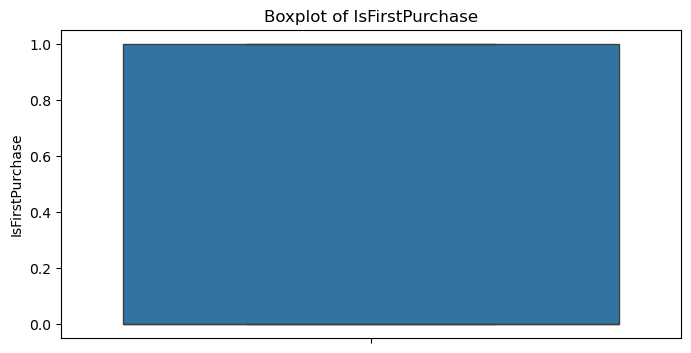

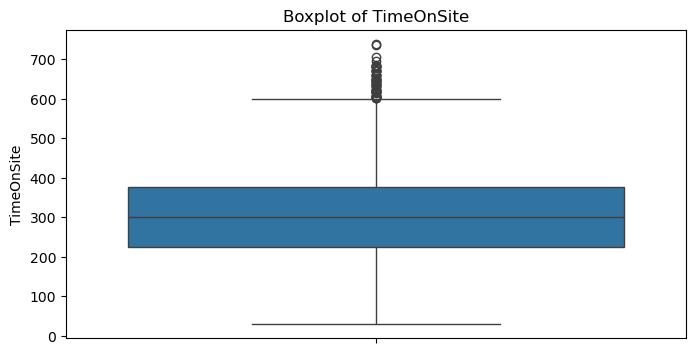

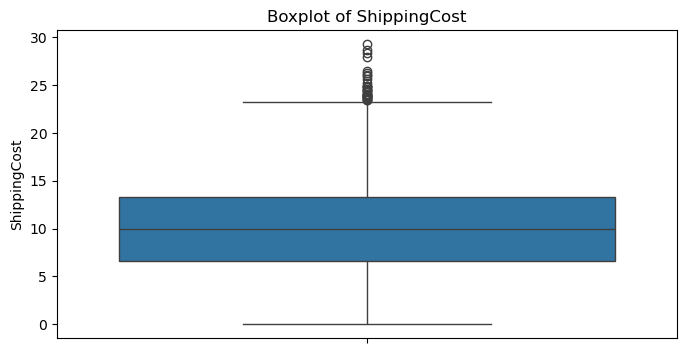

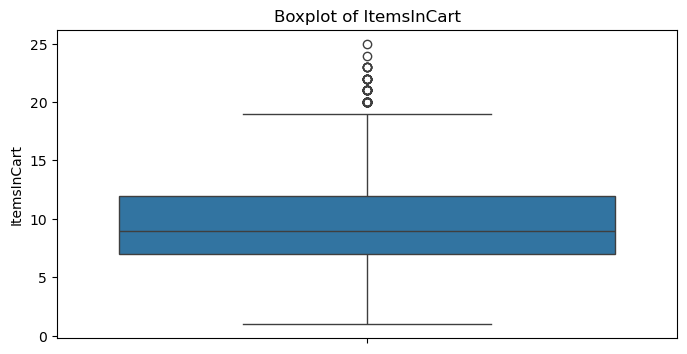

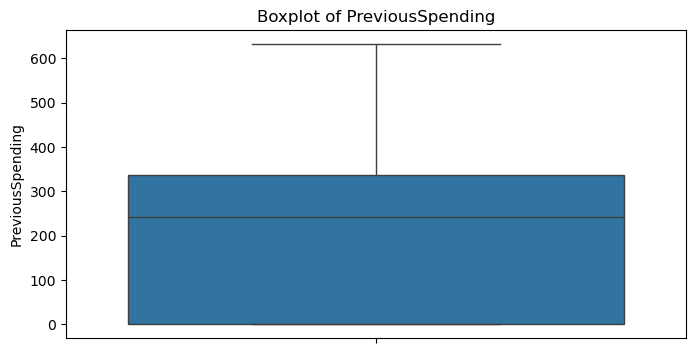

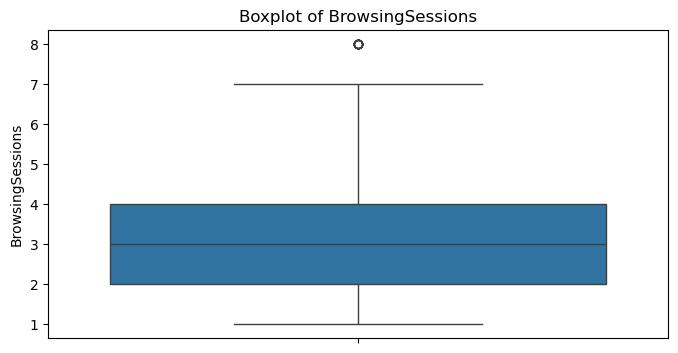

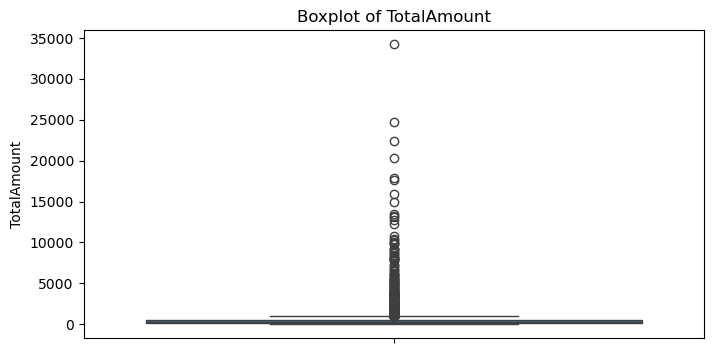

In [ ]:
# boxplot for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=retail_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Summary statistics of the cleaned data

In [ ]:
numeric_cols = [col for col in retail_df.columns if retail_df[col].dtype in ['int64', 'float64']]
print(numeric_cols)

['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount']


In [ ]:
# for numberical variables , calculate mean, median, mode, Q1, Q3, IQR, lower bound and upper bound, standard deviation, variance  
numeric_cols = ['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount']
for col in numeric_cols:
    mean = retail_df[col].mean()
    median = retail_df[col].median()
    mode = retail_df[col].mode()[0]
    Q1 = retail_df[col].quantile(0.25)
    Q3 = retail_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    std_dev = retail_df[col].std()
    variance = retail_df[col].var()
    
    print(f'Statistics for {col}:')
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Mode: {mode}')
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    print(f'Standard Deviation: {std_dev}')
    print(f'Variance: {variance}')
    print('\n')

Statistics for Quantity:
Mean: 9.166105263157895
Median: 9.0
Mode: 9
Q1: 6.0
Q3: 11.0
IQR: 5.0
Lower Bound: -1.5
Upper Bound: 18.5
Standard Deviation: 5.267773277002217
Variance: 27.74943529789867


Statistics for UnitPrice:
Mean: 58.45958631578948
Median: 43.675
Mode: 30.24
Q1: 31.35
Q3: 73.66
IQR: 42.309999999999995
Lower Bound: -32.11499999999999
Upper Bound: 137.125
Standard Deviation: 42.140770576746725
Variance: 1775.8445448020022


Statistics for DiscountApplied:
Mean: 18.181400000000004
Median: 13.6
Mode: 0.0
Q1: 0.0
Q3: 34.8
IQR: 34.8
Lower Bound: -52.199999999999996
Upper Bound: 87.0
Standard Deviation: 18.531474673429667
Variance: 343.41555357196523


Statistics for ReviewRating:
Mean: 3.5722105263157893
Median: 4.0
Mode: 4.0
Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower Bound: 1.5
Upper Bound: 5.5
Standard Deviation: 0.9846416980287326
Variance: 0.9695192734969057


Statistics for IsFirstPurchase:
Mean: 0.3028421052631579
Median: 0.0
Mode: 0
Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Bound: -1.5
Uppe

# Histogram for numerical variables (with kde)
Whatis kde?

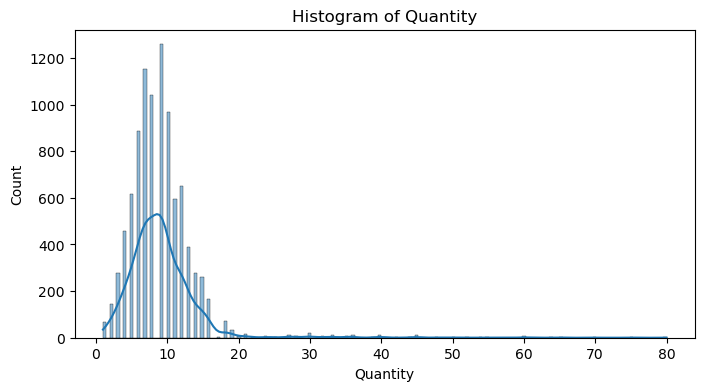

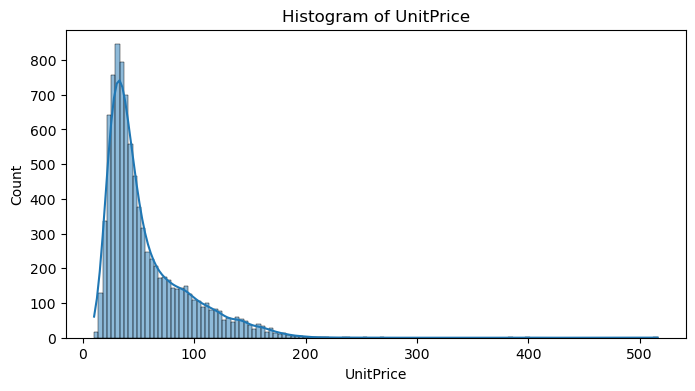

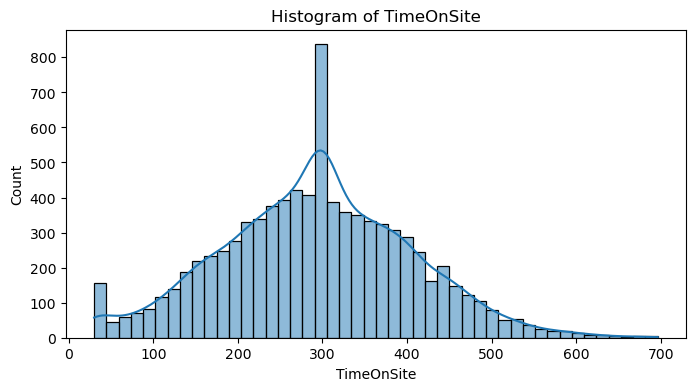

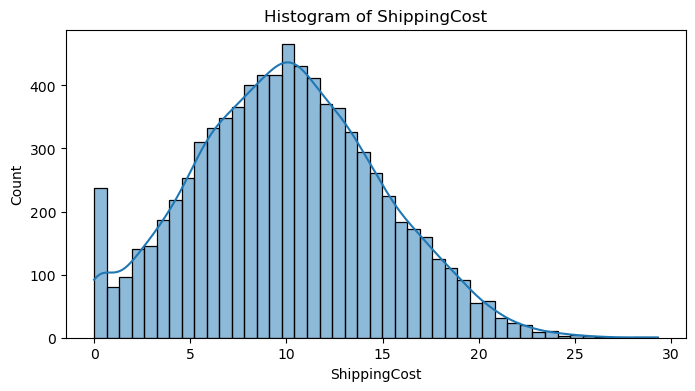

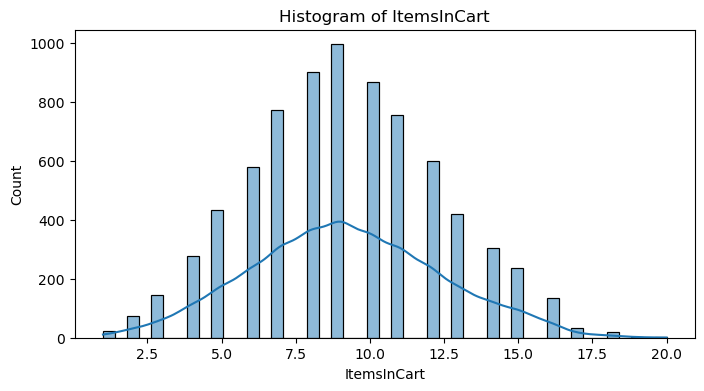

In [ ]:
# histogram for numerical columns with exception of review rating and history of previous purchases (these two are categorical variables) , do not include 0 in the graph and remove outlers beyond 95th percentile
num_cols =['Quantity', 'UnitPrice', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', "PreviousSpending", 'TotalAmount']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(retail_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    retail_df = retail_df[retail_df[col] > 0]
    upper_limit = retail_df[col].quantile(0.95)
    retail_df = retail_df[retail_df[col] <= upper_limit]
    plt.show()
    #are we removing outliers here? is it feasible to remove outliers this way?

# Box plot and scatterplot for numerical columns

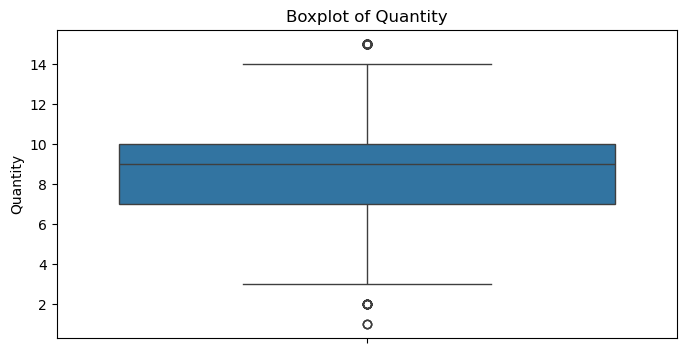

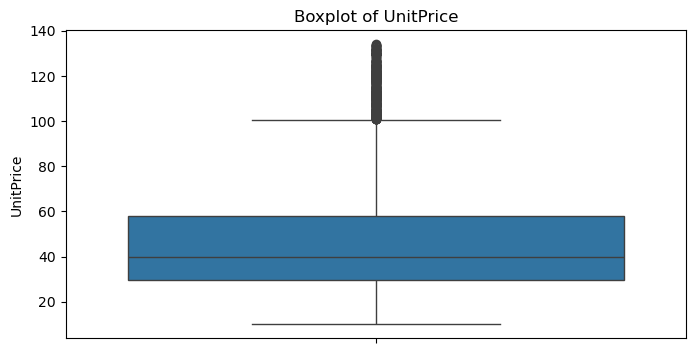

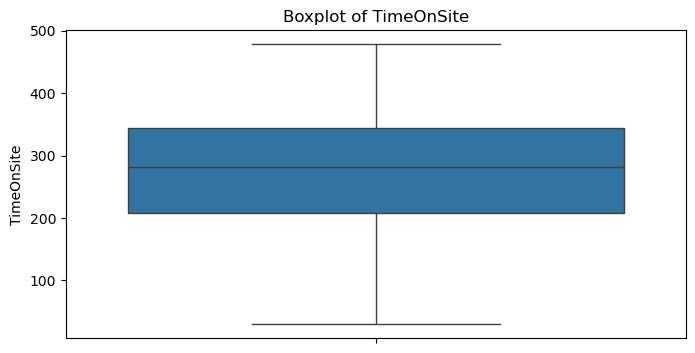

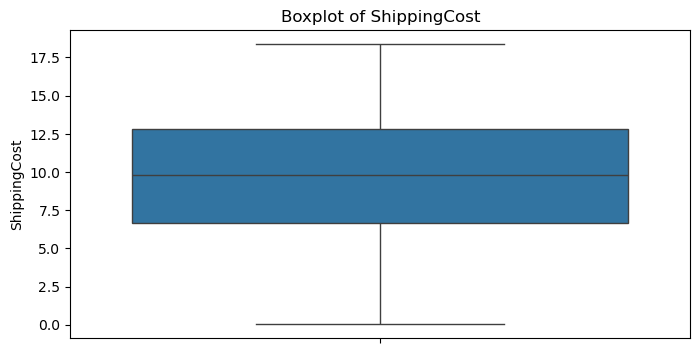

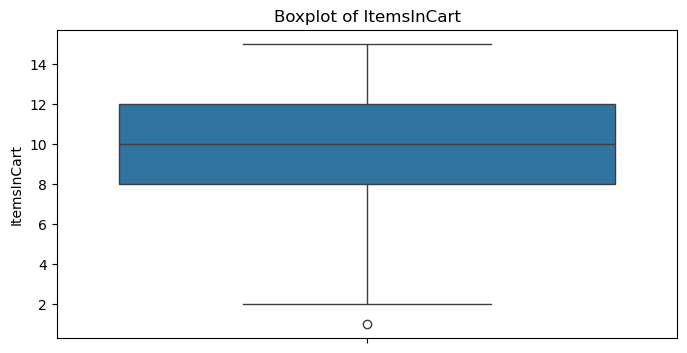

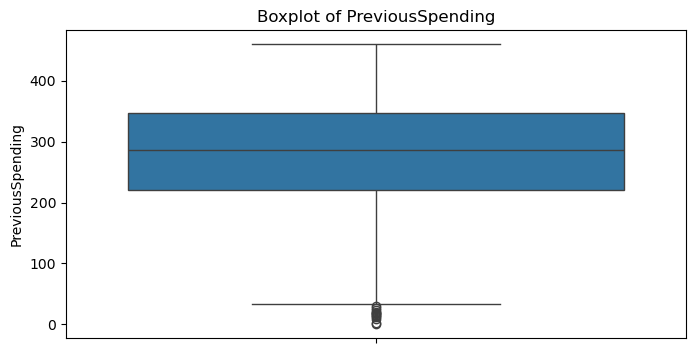

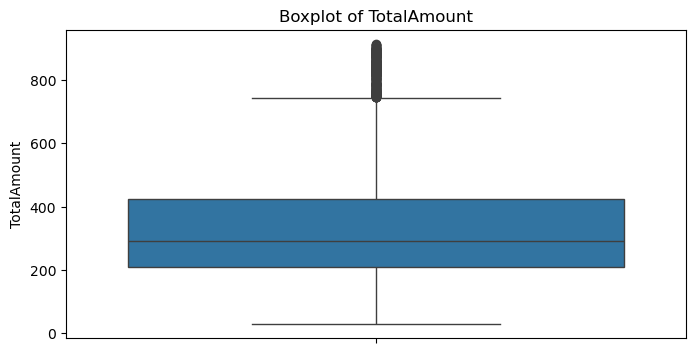

In [ ]:
# box plot for numerical columns 
# scatter plot for numerical columns 
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=retail_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Why we repeat the box plot for numeric columns? I can't see the outlier management. Was there? Anyone would show me, please?

In [ ]:
#outlier management is done by removing values beyond 95th percentile in the histogram above.


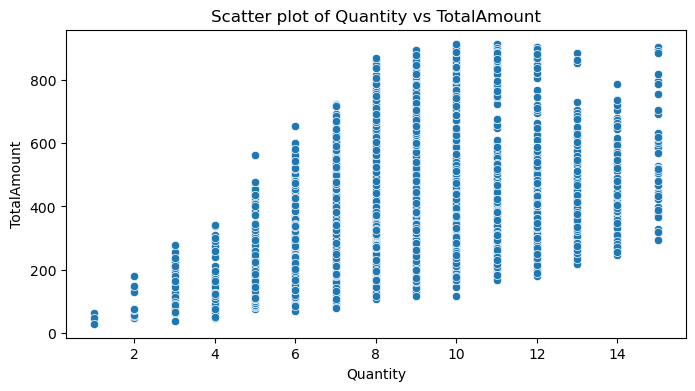

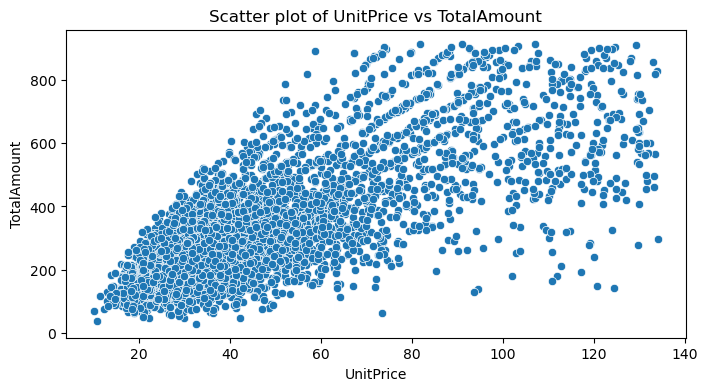

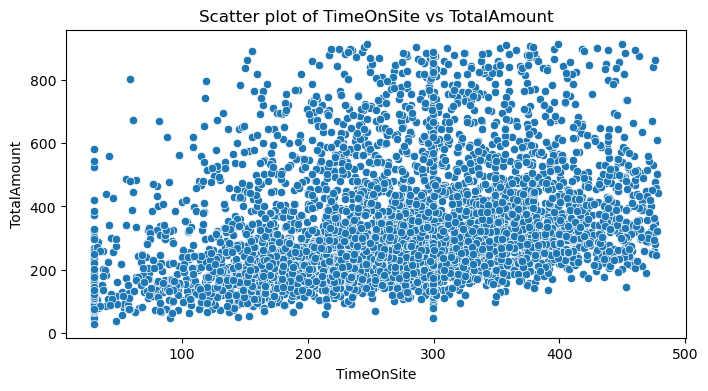

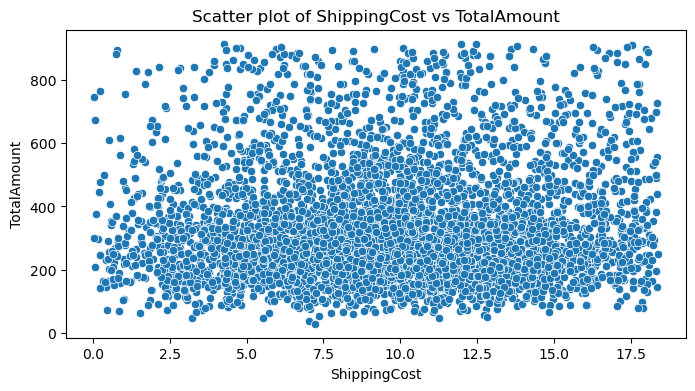

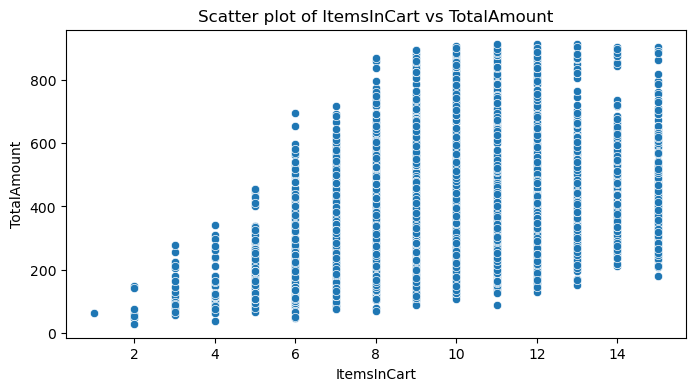

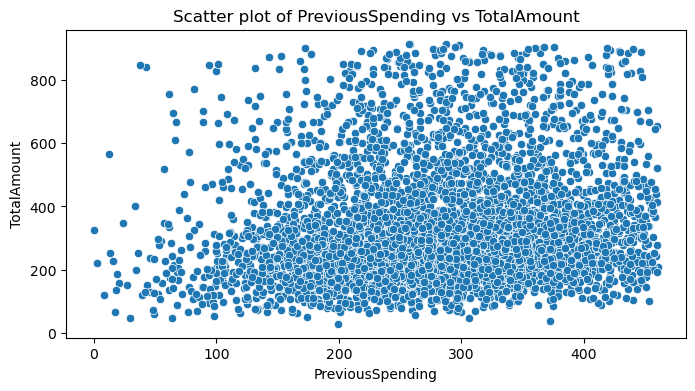

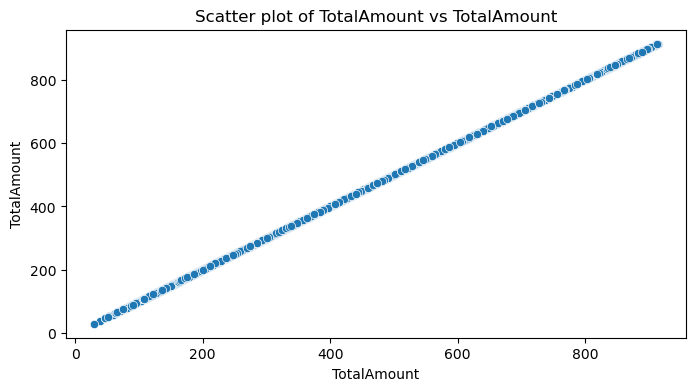

In [ ]:
# a scatter plot between each numerical column and TotalAmount
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=retail_df[col], y=retail_df["TotalAmount"])
    plt.title(f'Scatter plot of {col} vs TotalAmount')
    plt.show()

# Correlation between different numerical variables and total amount

In [19]:
# calculate correlation  cofficienct of numerical variables with total amount
num_cols =['Quantity', 'UnitPrice', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', "PreviousSpending", 'TotalAmount']
num_cols = retail_df[num_cols]
correlation = num_cols.corr()
print(correlation)

                  Quantity  UnitPrice  TimeOnSite  ShippingCost  ItemsInCart  \
Quantity          1.000000   0.321691    0.413870      0.006226     0.648289   
UnitPrice         0.321691   1.000000    0.118571      0.009159     0.086206   
TimeOnSite        0.413870   0.118571    1.000000      0.003955     0.588837   
ShippingCost      0.006226   0.009159    0.003955      1.000000     0.004380   
ItemsInCart       0.648289   0.086206    0.588837      0.004380     1.000000   
PreviousSpending  0.377318  -0.007934   -0.002807      0.005132     0.542788   
TotalAmount       0.715554   0.626243    0.157917      0.012642     0.228472   

                  PreviousSpending  TotalAmount  
Quantity                  0.377318     0.715554  
UnitPrice                -0.007934     0.626243  
TimeOnSite               -0.002807     0.157917  
ShippingCost              0.005132     0.012642  
ItemsInCart               0.542788     0.228472  
PreviousSpending          1.000000     0.108856  
TotalAmou

From the above correlation coefficient , we can see that quantity (coef = 0.48), Unit Price (coef = 0.67) and Items in cart (0.43) have positive corrlation with total amount. Others have weak or no correlation. 

# Hypothesis testing

In [ ]:
# hypothesis testing
# Hypothesis 0: There is no significant difference in TotalAmount spent between customers based on quanity, items in cart and Unit Price.
# Hypothesis 1: There is significant difference in TotalAmount spent between customers based on quanity, items and Unit Price.
from scipy import stats
alpha = 0.05
# correlation test
corr_quantity = retail_df['Quantity'].corr(retail_df['TotalAmount'])
corr_unitprice = retail_df['UnitPrice'].corr(retail_df['TotalAmount'])
corr_itemsincart = retail_df['ItemsInCart'].corr(retail_df['TotalAmount'])
print(f'Correlation between Quantity and TotalAmount: {corr_quantity}')
print(f'Correlation between UnitPrice and TotalAmount: {corr_unitprice}')
print(f'Correlation between ItemsInCart and TotalAmount: {corr_itemsincart}')
# p-value for correlation test
p_value_quantity = stats.pearsonr(retail_df['Quantity'], retail_df['TotalAmount'])[1]
p_value_unitprice = stats.pearsonr(retail_df['UnitPrice'], retail_df['TotalAmount'])[1]
p_value_itemsincart = stats.pearsonr(retail_df['ItemsInCart'], retail_df['TotalAmount'])[1]
print(f'P-value for correlation between Quantity and TotalAmount: {p_value_quantity}')
print(f'P-value for correlation between UnitPrice and TotalAmount: {p_value_unitprice}')
print(f'P-value for correlation between ItemsInCart and TotalAmount: {p_value_itemsincart}')
if p_value_quantity < alpha:
    print('Reject the null hypothesis for Quantity')
else:
    print('Fail to reject the null hypothesis for Quantity')
if p_value_unitprice < alpha:
    print('Reject the null hypothesis for UnitPrice')
else:
    print('Fail to reject the null hypothesis for UnitPrice')
if p_value_itemsincart < alpha:
    print('Reject the null hypothesis for ItemsInCart')
else:
    print('Fail to reject the null hypothesis for ItemsInCart')

# conduct the same correlation test for other numerical variables
corr_timeonsite = retail_df['TimeOnSite'].corr(retail_df['TotalAmount'])
corr_shippingcost = retail_df['ShippingCost'].corr(retail_df['TotalAmount'])
corr_previousspending = retail_df['PreviousSpending'].corr(retail_df['TotalAmount'])
print(f'Correlation between TimeOnSite and TotalAmount: {corr_timeonsite}')
print(f'Correlation between ShippingCost and TotalAmount: {corr_shippingcost}')
print(f'Correlation between PreviousSpending and TotalAmount: {corr_previousspending}')
# p-value for correlation test
p_value_timeonsite = stats.pearsonr(retail_df['TimeOnSite'], retail_df['TotalAmount'])[1]
p_value_shippingcost = stats.pearsonr(retail_df['ShippingCost'], retail_df
['TotalAmount'])[1]
p_value_previousspending = stats.pearsonr(retail_df['PreviousSpending'], retail_df['TotalAmount'])[1]
print(f'P-value for correlation between TimeOnSite and TotalAmount: {p_value_timeonsite}')
print(f'P-value for correlation between ShippingCost and TotalAmount: {p_value_shippingcost}')
print(f'P-value for correlation between PreviousSpending and TotalAmount: {p_value_previousspending}')
if p_value_timeonsite < alpha:
    print('Reject the null hypothesis for TimeOnSite')
else:
    print('Fail to reject the null hypothesis for TimeOnSite')
if p_value_shippingcost < alpha:
    print('Reject the null hypothesis for ShippingCost')
else:
    print('Fail to reject the null hypothesis for ShippingCost')
if p_value_previousspending < alpha:
    print('Reject the null hypothesis for PreviousSpending')
else:
    print('Fail to reject the null hypothesis for PreviousSpending')


Correlation between Quantity and TotalAmount: 0.41553514946993475
Correlation between UnitPrice and TotalAmount: 0.7388413047768176
Correlation between ItemsInCart and TotalAmount: 0.3785920530278409
P-value for correlation between Quantity and TotalAmount: 2.180376057913282e-189
P-value for correlation between UnitPrice and TotalAmount: 0.0
P-value for correlation between ItemsInCart and TotalAmount: 5.9888163777367406e-155
Reject the null hypothesis for Quantity
Reject the null hypothesis for UnitPrice
Reject the null hypothesis for ItemsInCart
Correlation between TimeOnSite and TotalAmount: 0.29669590898691245
Correlation between ShippingCost and TotalAmount: 0.04638834311109498
Correlation between PreviousSpending and TotalAmount: 0.12130708183673106
P-value for correlation between TimeOnSite and TotalAmount: 4.337759148934352e-93
P-value for correlation between ShippingCost and TotalAmount: 0.0017528200025859469
P-value for correlation between PreviousSpending and TotalAmount: 2.2

# Linear regression model

In [ ]:
# model the total amount using linear regression model using Quantity, items in cart and Unit Price as independent variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

In [ ]:
 # model the total amount using linear regression model using Quantity and Unit Price as independent variables
X = retail_df[['Quantity', 'UnitPrice']]
y = retail_df['TotalAmount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# model the total amount using linear regression model using Quantity and Unit Price as independent variables
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
# model the total amount using linear regression model using Quantity and Unit Price as independent variables 
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
# model the total amount using linear regression model using Quantity and Unit Price as independent variables 
# Predicting TotalAmount for new data
new_data = pd.DataFrame({'Quantity': [2, 5], 'UnitPrice': [20.0, 15.0]})
predictions = model.predict(new_data)
print(f'Predictions for new data: {predictions}')
# calculate the p-value for the correlation test and regression coefficients
import statsmodels.api as sm
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())




Mean Squared Error: 7680.016094743323
R-squared: 0.764846755916107
Intercept: -221.9103447562003
Coefficients: [34.38254192  5.40828807]
Predictions for new data: [-44.97949951  31.12668588]
                            OLS Regression Results                            
Dep. Variable:            TotalAmount   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     7164.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:40:20   Log-Likelihood:                -26844.
No. Observations:                4548   AIC:                         5.369e+04
Df Residuals:                    4545   BIC:                         5.371e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 co

# ANOVA for categorical columns

In [ ]:
print(retail_df.columns)

Index(['InvoiceNo', 'CustomerID', 'Date', 'ProductCategory', 'Quantity',
       'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase',
       'MarketingChannel', 'Country', 'TimeOnSite', 'ShippingCost',
       'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount'],
      dtype='object')


In [ ]:
#running ANOVA test for total amount against categorical column 'ProductCategory' and country
num_cols = retail_df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    groups = [retail_df[col][retail_df['ProductCategory'] == category] for category in retail_df['ProductCategory'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'ANOVA results for {col} by ProductCategory: F-statistic = {f_stat}, p-value = {p_value}')
    if p_value < 0.05:
        print(f'There is a significant difference in {col} across different ProductCategory categories.')

ANOVA results for Quantity by ProductCategory: F-statistic = 25.85691243827288, p-value = 7.99073909420328e-26
There is a significant difference in Quantity across different ProductCategory categories.
ANOVA results for UnitPrice by ProductCategory: F-statistic = 2485.8669420404863, p-value = 0.0
There is a significant difference in UnitPrice across different ProductCategory categories.
ANOVA results for DiscountApplied by ProductCategory: F-statistic = 3.690455733630874, p-value = 0.002462548179790043
There is a significant difference in DiscountApplied across different ProductCategory categories.
ANOVA results for ReviewRating by ProductCategory: F-statistic = 2.828539031163769, p-value = 0.014832274367253937
There is a significant difference in ReviewRating across different ProductCategory categories.
ANOVA results for IsFirstPurchase by ProductCategory: F-statistic = nan, p-value = nan
ANOVA results for TimeOnSite by ProductCategory: F-statistic = 13.083370099403483, p-value = 1.13

c:\Users\Administrator\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#running ANOVA test between continous variables against categorical variables column 'ProductCategory'
import scipy.stats as stats
categorical_col = 'ProductCategory'
for col in numeric_cols:
    groups = [retail_df[col][retail_df[categorical_col] == category] for category in retail_df[categorical_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'ANOVA results for {col} by {categorical_col}: F-statistic = {f_stat}, p-value = {p_value}')
    if p_value < 0.05:
        print(f'There is a significant difference in {col} across different {categorical_col} categories.')

ANOVA results for Quantity by ProductCategory: F-statistic = 25.85691243827288, p-value = 7.99073909420328e-26
There is a significant difference in Quantity across different ProductCategory categories.
ANOVA results for UnitPrice by ProductCategory: F-statistic = 2485.8669420404863, p-value = 0.0
There is a significant difference in UnitPrice across different ProductCategory categories.
ANOVA results for DiscountApplied by ProductCategory: F-statistic = 3.690455733630874, p-value = 0.002462548179790043
There is a significant difference in DiscountApplied across different ProductCategory categories.
ANOVA results for ReviewRating by ProductCategory: F-statistic = 2.828539031163769, p-value = 0.014832274367253937
There is a significant difference in ReviewRating across different ProductCategory categories.
ANOVA results for IsFirstPurchase by ProductCategory: F-statistic = nan, p-value = nan
ANOVA results for TimeOnSite by ProductCategory: F-statistic = 13.083370099403483, p-value = 1.13

In [ ]:
# Anova test for TotalAmount against country
categorical_col = 'Country'
for col in numeric_cols:
    groups = [retail_df[col][retail_df[categorical_col] == category] for category in retail_df[categorical_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'ANOVA results for {col} by {categorical_col}: F-statistic = {f_stat}, p-value = {p_value}')
    if p_value < 0.05:
        print(f'There is a significant difference in {col} across different {categorical_col} categories.')

ANOVA results for Quantity by Country: F-statistic = 0.485429637277527, p-value = 0.7874016298447926
ANOVA results for UnitPrice by Country: F-statistic = 0.7887882855608191, p-value = 0.5575743673153712
ANOVA results for DiscountApplied by Country: F-statistic = 0.844078474063147, p-value = 0.5182200062495357
ANOVA results for ReviewRating by Country: F-statistic = 0.8137045914979812, p-value = 0.5396614116994147
ANOVA results for IsFirstPurchase by Country: F-statistic = nan, p-value = nan
ANOVA results for TimeOnSite by Country: F-statistic = 1.013768745048578, p-value = 0.4076752217975615
ANOVA results for ShippingCost by Country: F-statistic = 0.7501446904054463, p-value = 0.5858798715119398
ANOVA results for ItemsInCart by Country: F-statistic = 0.03224362018868655, p-value = 0.9994754665133806
ANOVA results for PreviousSpending by Country: F-statistic = 1.122386734554585, p-value = 0.3460003230418297
ANOVA results for BrowsingSessions by Country: F-statistic = 1.7817619268788367

# Time series analysis


In [ ]:
# time series analysis using "Date" and "TotalAmount"
retail_df['Date'] = pd.to_datetime(retail_df['Date'])
retail_df.set_index('Date', inplace=True)
print(retail_df.index)
print(retail_df['TotalAmount'].resample('M').sum())


DatetimeIndex(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-02', '2023-01-02', '2023-01-02', '2023-01-02',
               '2023-01-02', '2023-01-02',
               ...
               '2023-12-31', '2023-12-31', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-12-31', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=4548, freq=None)
Date
2023-01-31     71653.32
2023-02-28     82045.57
2023-03-31    104410.13
2023-04-30    118623.80
2023-05-31    187389.69
2023-06-30    108366.48
2023-07-31    188061.57
2023-08-31    111891.08
2023-09-30    111313.42
2023-10-31    126704.30
2023-11-30    163827.20
2023-12-31    167317.98
Freq: ME, Name: TotalAmount, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27556\2139061974.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(retail_df['TotalAmount'].resample('M').sum())


In [ ]:
# calculate rolling mean for TotalAmount
rolling_mean = retail_df['TotalAmount'].rolling(window=3).mean().round(2)
print(rolling_mean.head(10))

Date
2023-01-01       NaN
2023-01-01       NaN
2023-01-01    307.58
2023-01-01    245.65
2023-01-02    212.61
2023-01-02    159.70
2023-01-02    201.57
2023-01-02    159.79
2023-01-02    181.22
2023-01-02    199.74
Name: TotalAmount, dtype: float64


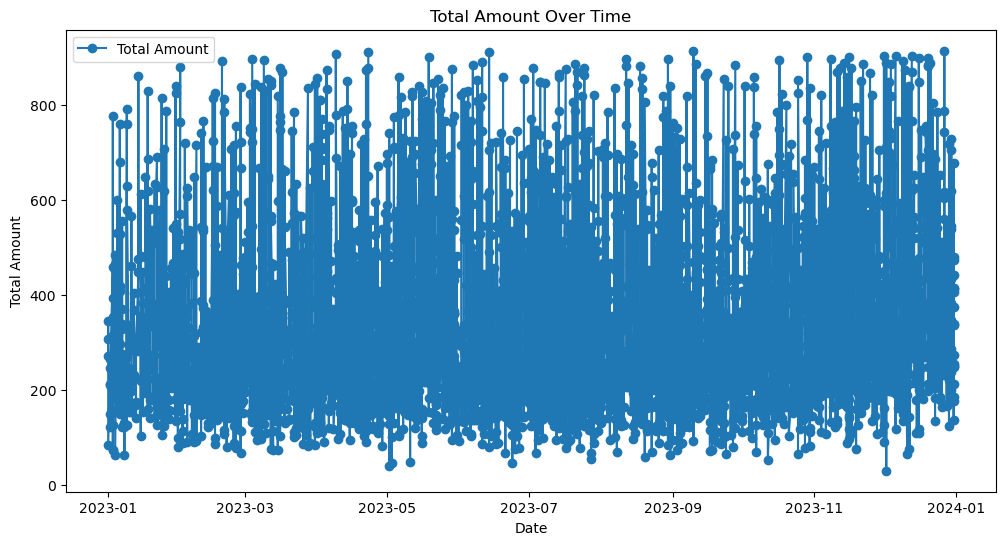

In [ ]:
# plot total amount with date as an index
plt.figure(figsize=(12,6))
plt.plot(retail_df['TotalAmount'], marker='o', label='Total Amount')
plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

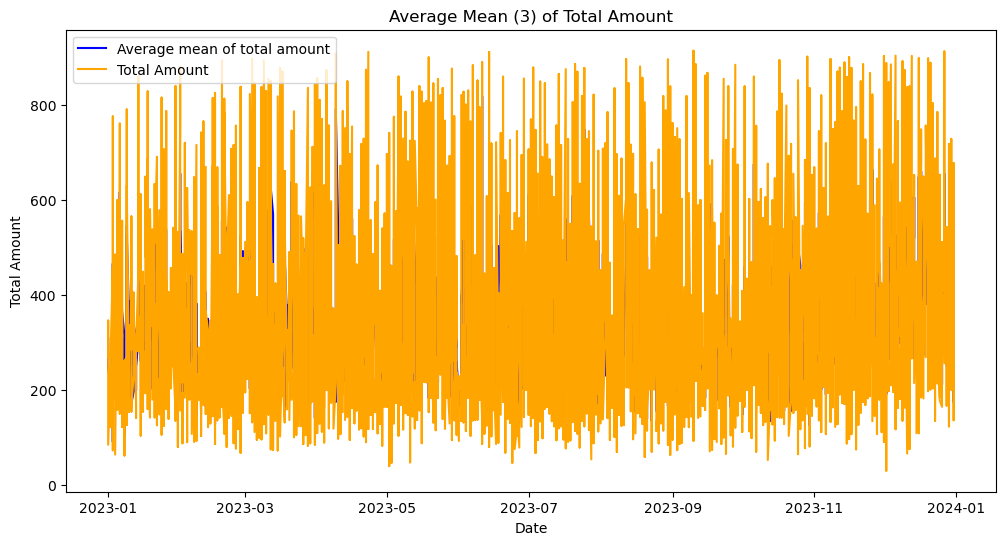

In [ ]:
# plot rolling mean of total amount with date as an index 
plt.figure(figsize=(12,6))
plt.plot(rolling_mean, color='blue', label='Average mean of total amount')
plt.plot(retail_df['TotalAmount'], color = "orange", label='Total Amount')
plt.title('Average Mean (3) of Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


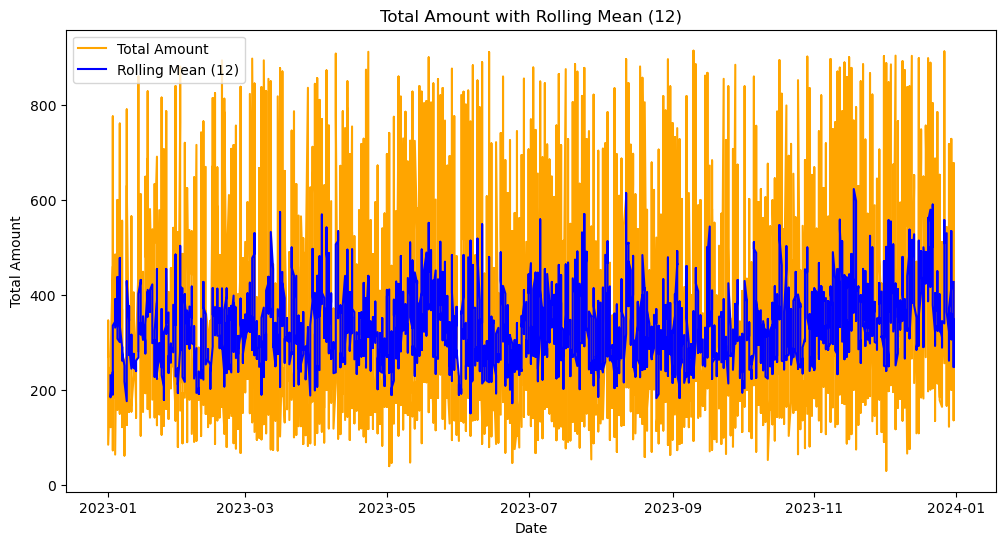

In [ ]:
# plot a rolling mean with span of 12 and total amount
plt.figure(figsize=(12,6))
plt.plot(retail_df['TotalAmount'], label='Total Amount', color='orange')
plt.plot(retail_df['TotalAmount'].rolling(window=7).mean(), label='Rolling Mean (12)', color='blue')
plt.title('Total Amount with Rolling Mean (12)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

In [ ]:
# summarize the findings in a markdown cell


Summary of the findings: 
1. 